In [4]:
import tensorflow as tf
from keras.applications import VGG19

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"<key>","key":"<value>"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [02:03<00:00, 24.5MB/s]
100% 2.70G/2.70G [02:03<00:00, 23.4MB/s]


In [ ]:
!unzip new-plant-diseases-dataset

In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( IMAGE_SIZE,IMAGE_SIZE, 3))
vgg_layer_list = vgg.layers

model = Sequential ()

for layer in vgg_layer_list:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
    
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(38))
model.add(Activation('softmax'))
model.summary()

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=test_generator, 
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/10
1099/1099 [==============================] - 410s 372ms/step - loss: 1.0609 - accuracy: 0.7782 - val_loss: 0.2502 - val_accuracy: 0.9263
Epoch 2/10
1099/1099 [==============================] - 400s 364ms/step - loss: 0.2589 - accuracy: 0.9262 - val_loss: 0.2185 - val_accuracy: 0.9400
Epoch 3/10
1099/1099 [==============================] - 399s 363ms/step - loss: 0.1719 - accuracy: 0.9521 - val_loss: 0.1923 - val_accuracy: 0.9487
Epoch 4/10
1099/1099 [==============================] - 397s 361ms/step - loss: 0.1311 - accuracy: 0.9646 - val_loss: 0.2026 - val_accuracy: 0.9534
Epoch 5/10
1099/1099 [==============================] - 397s 361ms/step - loss: 0.1097 - accuracy: 0.9699 - val_loss: 0.2043 - val_accuracy: 0.9552
Epoch 6/10
1099/1099 [==============================] - 397s 361ms/step - loss: 0.0962 - accuracy: 0.9743 - val_loss: 0.1956 - val_accuracy: 0.9578
Epoch 7/10
1099/1099 [==============================] - 399s 363ms/step - loss: 0.0824 - accuracy: 0.9790 - val_

KeyboardInterrupt: ignored

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  


NameError: ignored

In [ ]:
score = model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

 451/1099 [===========>..................] - ETA: 3:07 - loss: 0.0094 - accuracy: 0.9968

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

275/275 [==============================] - 81s 294ms/step - loss: 0.1946 - accuracy: 0.9614
Accuracy: 96.14%
Loss:  0.1946445107460022


In [ ]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key
labels

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
!rm -R '/content/model'
!mkdir '/content/model'
model.save('/content/model')

!zip -r model.zip /content/model

rm: cannot remove '/content/model': No such file or directory


  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 90%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 69%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/model/keras_metadata.pb (deflated 95%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/fingerprint.pb (stored 0%)


In [ ]:
!cp model.zip /content/drive/MyDrive/model/

2/2 [==============================] - 0s 187ms/step
1
1
Apple___Black_rot


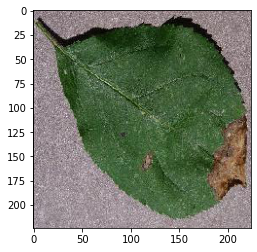

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, _ = next(train_generator)
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

2/2 [==============================] - 0s 191ms/step
6
6
Cherry_(including_sour)___healthy


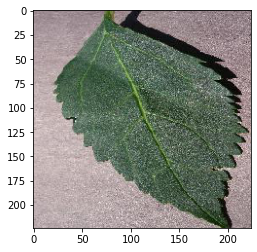

In [ ]:
images, _ = next(train_generator)
plt.imshow(images[0].astype('uint8'))
print(np.argmax(model.predict(images)))
print(np.argmax(_))
print(labels[np.argmax(_)])

**make sure the image is focused towards the leaf **

In [ ]:
import urllib.request
urllib.request.urlretrieve("https://ag.umass.edu/sites/ag.umass.edu/files/fact-sheets/images/apple-scab_02a.jpg", "apple-scab.jpg")
urllib.request.urlretrieve("https://ohioline.osu.edu/sites/ohioline/files/imce/Plant_Pathology/PLPATH-FRU-35-Strawberry-Leaf-Diseases-figure-3.jpg","strawberry-disease.jpg")

('strawberry-disease.jpg', <http.client.HTTPMessage at 0x7ff7b7113400>)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

reconstructed_model = tf.keras.models.load_model('/content/model/')

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(labels[np.argmax(result)])
  cv2_imshow(resized)

Original Dimensions :  (1918, 1512, 3)
1/1 [==============================] - 0s 36ms/step
Apple___Apple_scab


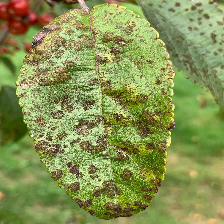

In [ ]:
GetResultForImage("apple-scab.jpg")

Original Dimensions :  (686, 1044, 3)
1/1 [==============================] - 0s 23ms/step
Strawberry___Leaf_scorch


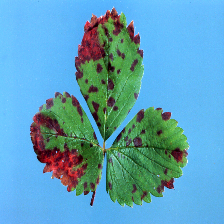

In [ ]:
GetResultForImage("strawberry-disease.jpg")

In [2]:
!unzip "/content/drive/MyDrive/H Youtube/Topics/Videos/Video 15 - Leaf Disease Prediction/model.zip"

Archive:  /content/drive/MyDrive/H Youtube/Topics/Videos/Video 15 - Leaf Disease Prediction/model.zip
   creating: content/model/
  inflating: content/model/saved_model.pb  
   creating: content/model/variables/
  inflating: content/model/variables/variables.index  
  inflating: content/model/variables/variables.data-00000-of-00001  
  inflating: content/model/keras_metadata.pb  
   creating: content/model/assets/
 extracting: content/model/fingerprint.pb  


In [16]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

IMAGE_SIZE = 224
reconstructed_model = tf.keras.models.load_model('/content/content/model/')

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(np.argmax(result))
  cv2_imshow(resized)

In [7]:
import urllib.request
urllib.request.urlretrieve("https://ag.umass.edu/sites/ag.umass.edu/files/fact-sheets/images/apple-scab_02a.jpg", "apple-scab.jpg")
urllib.request.urlretrieve("https://ohioline.osu.edu/sites/ohioline/files/imce/Plant_Pathology/PLPATH-FRU-35-Strawberry-Leaf-Diseases-figure-3.jpg","strawberry-disease.jpg")

('strawberry-disease.jpg', <http.client.HTTPMessage at 0x7f34602a5880>)

Original Dimensions :  (1918, 1512, 3)
1/1 [==============================] - 1s 805ms/step
0


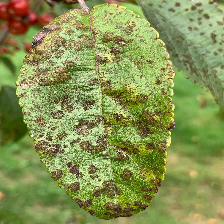

In [17]:
GetResultForImage("apple-scab.jpg")

Original Dimensions :  (686, 1044, 3)
1/1 [==============================] - 1s 657ms/step
26


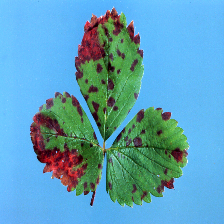

In [18]:
GetResultForImage("strawberry-disease.jpg")